# Problem illustration

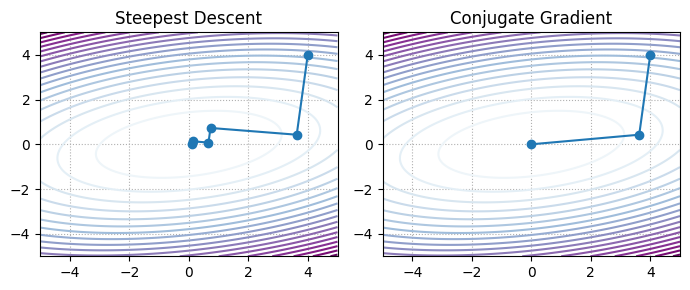

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import grad

mu = 1
L = 5

theta = np.radians(10)
Q = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
Lambda = np.diag([mu, L])
A = np.dot(Q, np.dot(Lambda, Q.T))
quadratic_function = lambda x: 0.5 * jnp.dot(x, jnp.dot(A, x))
grad_quadratic_function = grad(quadratic_function)

# Plot contours function
def plot_contours(ax, function, x_range, y_range, resolution=200):
    x = np.linspace(x_range[0], x_range[1], resolution)
    y = np.linspace(y_range[0], y_range[1], resolution)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros(X.shape)
    
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = function(np.array([X[i, j], Y[i, j]]))
    
    ax.contour(X, Y, Z, levels=20, cmap="BuPu")

# Gradient Descent with Exact Line Search
def gradient_descent_exact_line_search(grad_func, x, num_steps=50):
    trajectory = [x]
    for _ in range(num_steps):
        gradient = grad_func(x)
        # Exact line search for quadratic functions
        step_size = jnp.dot(gradient, gradient) / jnp.dot(gradient, jnp.dot(A, gradient))
        x = x - step_size * gradient
        trajectory.append(x)
    return np.array(trajectory)

# Conjugate Gradient Method
def conjugate_gradient(A, b, x, num_steps=50):
    trajectory = [x]
    r = b - jnp.dot(A, x)
    p = r
    for _ in range(num_steps):
        Ap = jnp.dot(A, p)
        alpha = jnp.dot(r, r) / jnp.dot(p, Ap)
        x = x + alpha * p
        r_new = r - alpha * Ap
        beta = jnp.dot(r_new, r_new) / jnp.dot(r, r)
        p = r_new + beta * p
        r = r_new
        trajectory.append(x)
    return np.array(trajectory)

# Setup start point and b vector for CG
start_point = jnp.array([4.0, 4.0])
b = jnp.dot(A, jnp.zeros(2))  # Arbitrary choice for illustration

# Solve trajectories
trajectory_gd_exact = gradient_descent_exact_line_search(grad_quadratic_function, start_point, 5)
trajectory_cg = conjugate_gradient(A, b, start_point, 2)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(7, 3))

# Gradient Descent with Exact Line Search Plot
plot_contours(axs[0], quadratic_function, x_range=(-5, 5), y_range=(-5, 5))
axs[0].plot(trajectory_gd_exact[:, 0], trajectory_gd_exact[:, 1], 'o-', label='Steepest Descent')
axs[0].set_title('Steepest Descent')

# Conjugate Gradient Plot
plot_contours(axs[1], quadratic_function, x_range=(-5, 5), y_range=(-5, 5))
axs[1].plot(trajectory_cg[:, 0], trajectory_cg[:, 1], 'o-', label='Conjugate Gradient')
axs[1].set_title('Conjugate Gradient')

for ax in axs:
    # ax.legend()
    ax.grid(linestyle=":")

plt.tight_layout()
plt.savefig("SD_vs_CG.pdf")
plt.show()


# $A$ - orthogonality

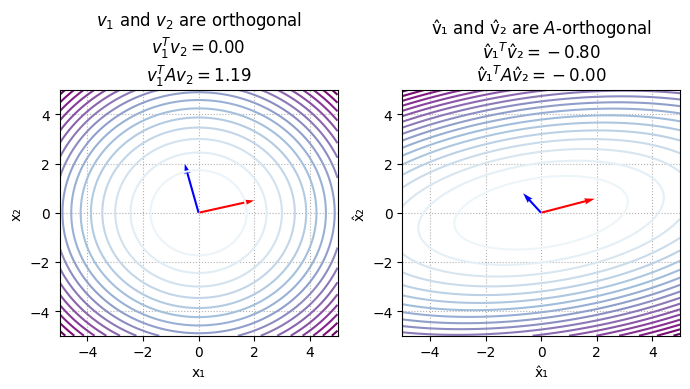

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import grad
from numpy.linalg import cholesky

mu = 1
L = 5

theta = np.radians(10)
Q = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
Lambda = np.diag([mu, L])
A_transformed = np.dot(Q, np.dot(Lambda, Q.T))
A = A_transformed
quadratic_function = lambda x: 0.5 * jnp.dot(x, jnp.dot(A, x))
grad_quadratic_function = grad(quadratic_function)

# Plot contours function
def plot_contours(ax, function, x_range, y_range, resolution=200):
    x = np.linspace(x_range[0], x_range[1], resolution)
    y = np.linspace(y_range[0], y_range[1], resolution)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros(X.shape)
    
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = function(np.array([X[i, j], Y[i, j]]))
    
    ax.contour(X, Y, Z, levels=20, cmap="BuPu")

# Define the vectors v1 and v2
v1 = np.array([2, 0.5])
v2 = np.array([-.5, 2])

# A = I for the left plot (standard orthogonality)
A_identity = np.eye(2)

# Calculate the transformed vectors using A^(1/2)
A_inv_sqrt = Q @ np.diag([1/np.sqrt(l) for l in np.diag(Lambda)])
v1_transformed = A_inv_sqrt @ v1
v2_transformed = A_inv_sqrt @ v2

# Set up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(7, 4))

# Conjugate Gradient Plot
A = A_identity
plot_contours(axs[0], quadratic_function, x_range=(-5, 5), y_range=(-5, 5))

# Plot the original vectors v1 and v2 on the left plot
axs[0].quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='red')
axs[0].set_xlabel("x₁")
axs[0].set_ylabel("x₂")
axs[0].quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='blue')
axs[0].set_title(f"$v_1$ and $v_2$ are orthogonal\n$v_1^T v_2 = {np.dot(v1, v2):.2f}$\n$v_1^T A v_2 = {np.dot(v1, np.dot(A_transformed, v2)):.2f}$")

A = A_transformed
plot_contours(axs[1], quadratic_function, x_range=(-5, 5), y_range=(-5, 5))

# Plot the transformed vectors on the right plot
axs[1].quiver(0, 0, v1_transformed[0], v1_transformed[1], angles='xy', scale_units='xy', scale=1, color='red')
axs[1].set_xlabel("x̂₁")
axs[1].set_ylabel("x̂₂")
axs[1].quiver(0, 0, v2_transformed[0], v2_transformed[1], angles='xy', scale_units='xy', scale=1, color='blue')
axs[1].set_title(f"v̂₁ and v̂₂ are $A$-orthogonal\n$v̂₁^T v̂₂ = {np.dot(v1_transformed, v2_transformed):.2f}$\n$v̂₁^T A v̂₂ = {-np.dot(v1_transformed, np.dot(A_transformed, v2_transformed)):.2f}$")

for ax in axs:
    # ax.legend()
    ax.grid(linestyle=":")

plt.tight_layout()
plt.savefig("A_orthogonality.pdf")
plt.show()


# Comparison for quadratics

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(228)

# Parameters
n = 100  # Dimension of x
mu = 10
L = 100


def generate_problem(n=100, mu=mu, L=L, problem_type="clustered"):
    np.random.seed(228)
    if problem_type == "clustered":
        A = np.diagflat([mu*np.ones(n//4), (mu+ (L-mu)/3) * np.ones(n//4), (mu+ 2*(L-mu)/3)*np.ones(n//4), L*np.ones(n//4)])
        U = np.random.rand(n, n)
        Q, _ = np.linalg.qr(U)
        A = Q.dot(A).dot(Q.T)
        A = (A + A.T) * 0.5
        x_opt = np.random.rand(n)
        b = A@x_opt
        x_0 = 5*np.random.randn(n)

    elif problem_type == "random":
        A = np.random.randn(n, n)
        factual_L = max(np.linalg.eigvalsh(A.T@A))
        A = A.T.dot(A)/factual_L*L + mu*np.eye(n)
        x_opt = np.random.rand(n)
        b = A@x_opt
        x_0 = 3*np.random.randn(n)
    
    elif problem_type == "uniform spectrum":
        A = np.diag(np.linspace(mu, L, n, endpoint=True))
        x_opt = np.random.rand(n)
        b = A@x_opt
        x_0 = 3*np.random.randn(n)

    elif problem_type == "Hilbert":
        A = np.array([[1.0 / (i+j - 1) for i in range(1, n+1)] for j in range(1, n+1)])
        b = np.ones(n)
        x_0 = 3*np.random.randn(n)
        x_opt = np.linalg.lstsq(A, b)[0]

    return A, b, x_0, x_opt

# Optimization methods
def gradient_descent(f, grad_f, x_0, step_size, iterations, x_opt):
    x = x_0.copy()
    f_opt = f(x_opt)
    values, gradients = [], []
    values.append(abs(f(x) - f_opt))
    gradients.append(np.linalg.norm(grad_f(x)))
    for _ in range(iterations):
        x -= step_size * grad_f(x)
        values.append(abs(f(x) - f_opt))
        gradients.append(np.linalg.norm(grad_f(x)))
    return values, gradients

def steepest_descent(A, f, grad_f, x_0, iterations, x_opt):
    x = x_0.copy()
    f_opt = f(x_opt)
    values, gradients = [], []
    values.append(abs(f(x) - f_opt))
    gradients.append(np.linalg.norm(grad_f(x)))
    for _ in range(iterations):
        grad = grad_f(x)
        step_size = np.dot(grad.T, grad) / np.dot(grad.T, np.dot(A, grad))
        x -= step_size * grad
        values.append(abs(f(x) - f_opt))
        gradients.append(np.linalg.norm(grad))
    return values, gradients

def nesterov_accelerated_gradient(A, b, x_0, alpha, beta, iterations, x_opt):
    x = x_0.copy()
    y = x.copy()
    f_opt = f(x_opt)
    prev_x = x.copy()
    values, gradients = [f(x)], [np.linalg.norm(np.dot(A, x) - b)]
    for _ in range(iterations):
        y = (1-beta)*y + beta * x
        grad = grad_f(y)
        x, y = y - alpha * grad, y
        
        values.append(abs(f(x) - f_opt))
        gradients.append(np.linalg.norm(grad))
    return values, gradients

def conjugate_gradient(A, b, x_0, iterations, x_opt):
    x = x_0.copy()
    f = lambda x: 0.5 * x.T @ A @ x - b.T @ x
    f_opt = f(x_opt)
    r = b - np.dot(A, x)
    p = r.copy()
    values, gradients = [f(x)], [np.linalg.norm(r)]
    for _ in range(iterations-1):
        alpha = np.dot(r.T, r) / np.dot(p.T, np.dot(A, p))
        x += alpha * p
        r_next = r - alpha * np.dot(A, p)
        beta = np.dot(r_next.T, r_next) / np.dot(r.T, r)
        p = r_next + beta * p
        r = r_next
        values.append(abs(f(x) - f_opt))
        gradients.append(np.linalg.norm(r))
    return values, gradients


def run_experiment(params):
    A, b, x_0, x_opt = generate_problem(n=params["n"], mu=params["mu"], L=params["L"], problem_type=params["problem_type"])
    eigs = np.linalg.eigvalsh(A)
    mu, L = min(eigs), max(eigs)

    f = lambda x: 0.5 * x.T @ A @ x - b.T @ x
    grad_f = lambda x: A@x - b

    if mu <= 1e-2:
        alpha = 1/L
    else:
        alpha = 2/(mu+L)  # Step size
    beta = (np.sqrt(L) - np.sqrt(mu))/(np.sqrt(L) + np.sqrt(mu))  # Momentum parameter

    results = {
        "methods": {
            "Gradient Descent": gradient_descent(f, grad_f, x_0, alpha, params["iterations"], x_opt),
            "Steepest Descent": steepest_descent(A, f, grad_f, x_0, params["iterations"], x_opt),
            "Conjugate Gradients": conjugate_gradient(A, b, x_0, params["iterations"], x_opt),
            # "nag": nesterov_accelerated_gradient(A, b, x_0, alpha, beta, params["iterations"], x_opt),
        },
        "problem":{
            "eigs": eigs,
            "params": params
        }
    }
    return results


def plot_results(results):
    linestyles = {
        "Gradient Descent": "r-",
        "Steepest Descent": "b-.",
        "Conjugate Gradients": "g--"
    }
    plt.figure(figsize=(10, 3.5))
    mu = results["problem"]["params"]["mu"]
    L = results["problem"]["params"]["L"]
    n = results["problem"]["params"]["n"]
    problem_type = results["problem"]["params"]["problem_type"]
    
    if mu > 1e-2:
        plt.suptitle(f"Strongly convex quadratics. n={n}, {problem_type} matrix. ")
    else:
        plt.suptitle(f"Convex quadratics. n={n}, {problem_type} matrix. ")

    plt.subplot(1, 3, 1)
    eigs = results["problem"]["eigs"]
    plt.scatter(np.arange(len(eigs)), eigs)
    plt.xlabel('Dimension')
    plt.ylabel('Eigenvalues of A')
    plt.grid(linestyle=":")
    plt.title("Eigenvalues")
    if results["problem"]["params"]["problem_type"] == "Hilbert":
        plt.yscale("log")

    plt.subplot(1, 3, 2)
    for method, result_  in results["methods"].items():
        plt.semilogy(result_[0], linestyles[method])
    plt.xlabel('Iteration')
    plt.ylabel(r'$|f(x) -f^*|$')
    plt.grid(linestyle=":")
    plt.title("Function gap")

    plt.subplot(1, 3, 3)
    for method, result_ in results["methods"].items():
        plt.semilogy(result_[1], linestyles[method], label=method)
    plt.ylabel(r'$\|\nabla f(x)\|_2$')
    plt.grid(linestyle=":")
    plt.title("Norm of Gradient")

    # Place the legend below the plots
    plt.figlegend(loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.00))
    # Adjust layout to make space for the legend below
    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.savefig(f"cg_{problem_type}_{mu}_{L}_{n}.pdf")
    plt.show()

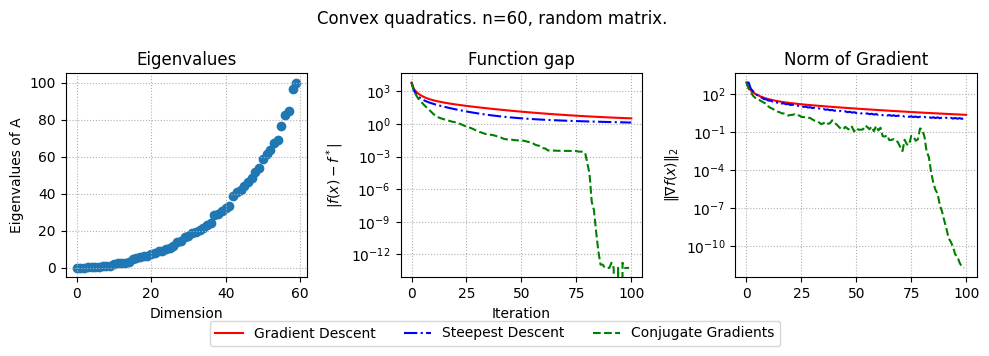

In [264]:
# Experiment parameters
params = {
    "n": 60,
    "mu": 1e-3,
    "L": 100,
    "iterations": 100,
    "problem_type": "random",  # Change to "clustered", "uniform spectrum", or "Hilbert" as needed
}

results = run_experiment(params)
plot_results(results)

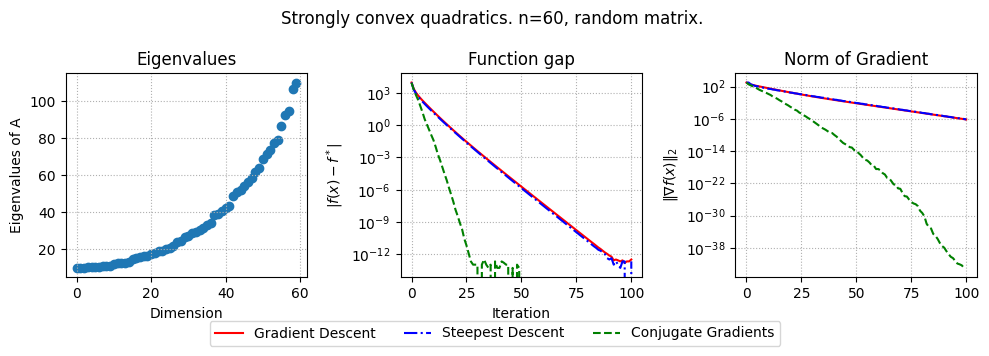

In [265]:
# Experiment parameters
params = {
    "n": 60,
    "mu": 10,
    "L": 100,
    "iterations": 100,
    "problem_type": "random",  # Change to "clustered", "uniform spectrum", or "Hilbert" as needed
}

results = run_experiment(params)
plot_results(results)

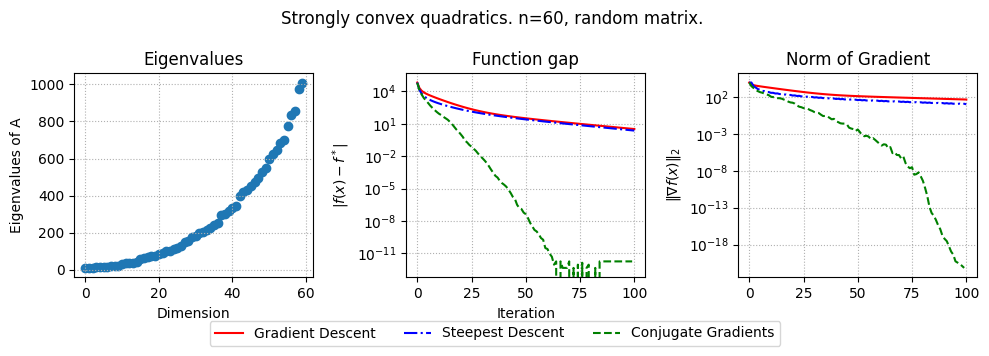

In [266]:
# Experiment parameters
params = {
    "n": 60,
    "mu": 10,
    "L": 1000,
    "iterations": 100,
    "problem_type": "random",  # Change to "clustered", "uniform spectrum", or "Hilbert" as needed
}

results = run_experiment(params)
plot_results(results)

/var/folders/7m/3rbdnx5n5sz625f3l87m91cc0000gn/T/ipykernel_41713/1862641365.py:96: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.dot(r.T, r) / np.dot(p.T, np.dot(A, p))


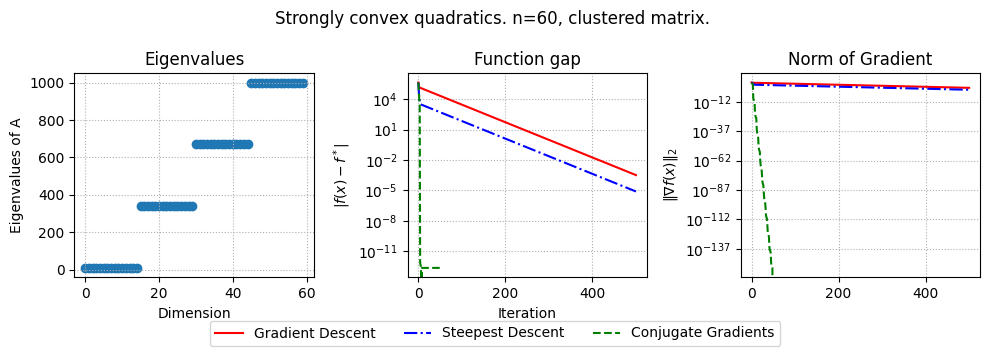

In [272]:
# Experiment parameters
params = {
    "n": 60,
    "mu": 10,
    "L": 1000,
    "iterations": 500,
    "problem_type": "clustered",  # Change to "clustered", "uniform spectrum", or "Hilbert" as needed
}

results = run_experiment(params)
plot_results(results)

/var/folders/7m/3rbdnx5n5sz625f3l87m91cc0000gn/T/ipykernel_41713/1862641365.py:99: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.dot(r_next.T, r_next) / np.dot(r.T, r)


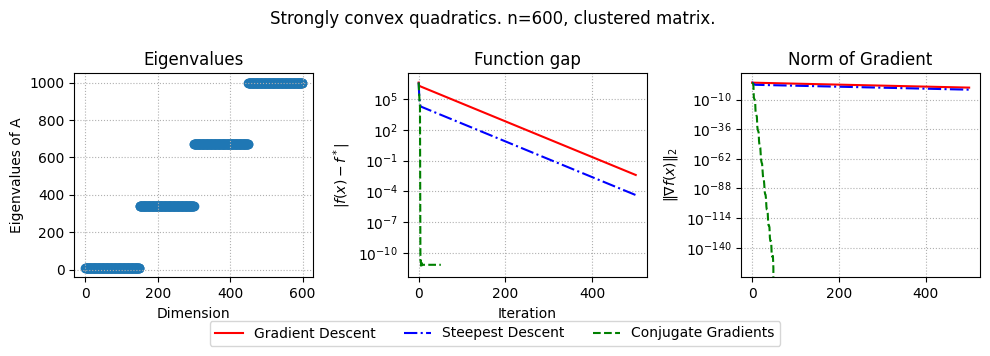

In [273]:
# Experiment parameters
params = {
    "n": 600,
    "mu": 10,
    "L": 1000,
    "iterations": 500,
    "problem_type": "clustered",  # Change to "clustered", "uniform spectrum", or "Hilbert" as needed
}

results = run_experiment(params)
plot_results(results)

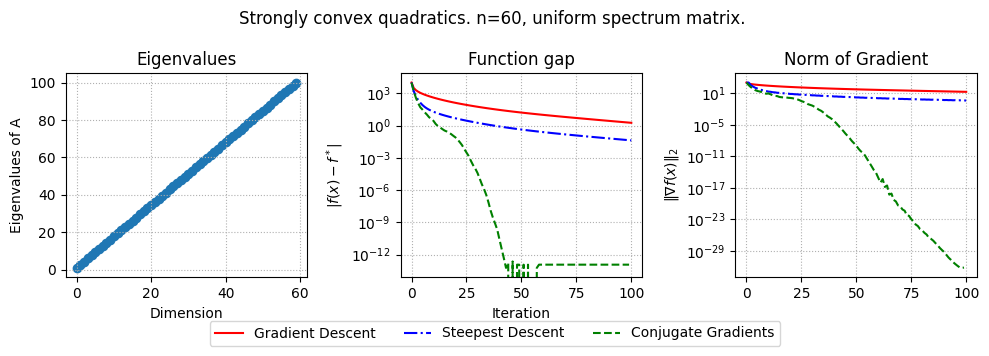

In [274]:
# Experiment parameters
params = {
    "n": 60,
    "mu": 1,
    "L": 100,
    "iterations": 100,
    "problem_type": "uniform spectrum",  # Change to "clustered", "uniform spectrum", or "Hilbert" as needed
}

results = run_experiment(params)
plot_results(results)

/var/folders/7m/3rbdnx5n5sz625f3l87m91cc0000gn/T/ipykernel_41713/2943301558.py:42: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_opt = np.linalg.lstsq(A, b)[0]
/var/folders/7m/3rbdnx5n5sz625f3l87m91cc0000gn/T/ipykernel_41713/2943301558.py:119: RuntimeWarning: invalid value encountered in sqrt
  beta = (np.sqrt(L) - np.sqrt(mu))/(np.sqrt(L) + np.sqrt(mu))  # Momentum parameter


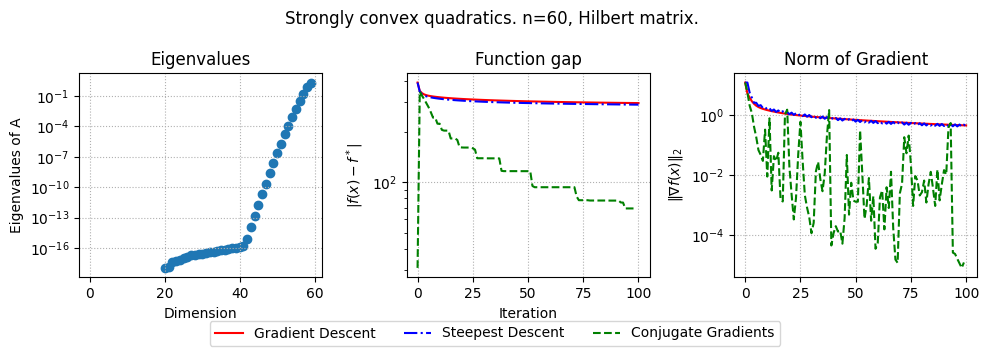

In [398]:
# Experiment parameters
params = {
    "n": 60,
    "mu": 1,
    "L": 10,
    "iterations": 100,
    "problem_type": "Hilbert",  # Change to "clustered", "uniform spectrum", or "Hilbert" as needed
}

results = run_experiment(params)
plot_results(results)

# Non linear CG

In [378]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as skldata
import jax
from jax import numpy as jnp
from jax.config import config
config.update("jax_enable_x64", True)
from scipy.optimize import minimize_scalar

np.random.seed(228)

def generate_problem(m=1000, n=300, mu=1):
    np.random.seed(228)
    # Generating synthetic data
    n = 300  # Number of features
    m = 1000  # Number of samples

    # Create a binary classification problem
    X, y = skldata.make_classification(n_classes=2, n_features=n, n_samples=m, n_informative=n//3, random_state=0)
    X = jnp.array(X)
    y = jnp.array(y)

    # Regularized logistic regression cost function
    @jax.jit
    def f(w):
        return jnp.linalg.norm(w)**2*mu/2 +  jnp.mean(jnp.logaddexp(jnp.zeros(X.shape[0]), -y * (X @ w)))
    
    grad_f = jax.jit(jax.grad(f))
    x_0 = jax.random.normal(jax.random.PRNGKey(0), (n,))

    return f, grad_f, x_0

# Optimization methods
def gradient_descent(f, grad_f, x_0, step_size, iterations):
    x = x_0.copy()
    values, gradients = [], []
    values.append(f(x))
    gradients.append(np.linalg.norm(grad_f(x)))
    for _ in range(iterations):
        x -= step_size * grad_f(x)
        values.append(f(x))
        gradients.append(np.linalg.norm(grad_f(x)))
    return values, gradients

def steepest_descent(f, grad_f, x_0, iterations):
    x = x_0.copy()
    values, gradients = [], []
    values.append(f(x))
    gradients.append(np.linalg.norm(grad_f(x)))
    for _ in range(iterations):
        grad = grad_f(x)
        res = minimize_scalar(lambda alpha: f(x - alpha * grad), bounds = (1e-8,1e1), method='Bounded', options={'maxiter': 50})
        step_size = res.x
        x -= step_size * grad
        values.append(f(x))
        gradients.append(np.linalg.norm(grad))
    return values, gradients

def ConjugateGradientFR(f, grad_f, x0, iterations, restart=False):
    x = x0
    grad = grad_f(x)
    values, gradients = [], []
    values.append(f(x))
    gradients.append(np.linalg.norm(grad_f(x)))
    d = -grad
    it = 0
    while it < iterations:
        res = minimize_scalar(lambda alpha: f(x + alpha * d), bounds = (1e-9,1e1), method='Bounded', options={'maxiter': 50})
        alpha = res.x
        x = x + alpha * d
        values.append(f(x))
        gradients.append(np.linalg.norm(grad))
        grad_next = grad_f(x)
        beta = grad_next.dot(grad_next) / grad.dot(grad)
        d = -grad_next + beta * d
        grad = grad_next.copy()
        it += 1
        if restart and it % restart == 0:
            grad = grad_f(x)
            d = -grad
        
    return values, gradients

def ConjugateGradientPR(f, grad_f, x0, iterations, restart=False):
    x = x0
    grad = grad_f(x)
    values, gradients = [], []
    values.append(f(x))
    gradients.append(np.linalg.norm(grad))
    d = -grad
    it = 0
    while it < iterations:
        # Line search for the optimal alpha
        res = minimize_scalar(lambda alpha: f(x + alpha * d), bounds=(1e-9, 1e1), method='Bounded', options={'maxiter': 50})
        alpha = res.x
        x = x + alpha * d
        values.append(f(x))
        gradients.append(np.linalg.norm(grad))
        grad_next = grad_f(x)
        # Calculate beta using Polak-Ribière formula
        beta = np.dot(grad_next, grad_next - grad) / np.dot(grad, grad)
        beta = max(0, beta)  # Ensure beta is non-negative
        d = -grad_next + beta * d
        grad = grad_next.copy()
        it += 1
        if restart and it % restart == 0:
            grad = grad_f(x)
            d = -grad
        
    return values, gradients


def run_experiment(params):
    f, grad_f, x_0 = generate_problem(n=params["n"], m=params["m"], mu=params["mu"])

    if params["restart"] is None:
        results = {
            "methods": {
                "Gradient Descent": gradient_descent(f, grad_f, x_0, params["alpha"], params["iterations"]),
                "Steepest Descent": steepest_descent(f, grad_f, x_0, params["iterations"]),
                "Conjugate Gradients PR": ConjugateGradientPR(f, grad_f, x_0, params["iterations"]),
                "Conjugate Gradients FR": ConjugateGradientFR(f, grad_f, x_0, params["iterations"]),
            },
            "problem":{
                "params": params
            }
        }
    else:
        results = {
            "methods": {
                "Gradient Descent": gradient_descent(f, grad_f, x_0, params["alpha"], params["iterations"]),
                "Steepest Descent": steepest_descent(f, grad_f, x_0, params["iterations"]),
                "Conjugate Gradients PR": ConjugateGradientPR(f, grad_f, x_0, params["iterations"]),
                f"Conjugate Gradients PR. restart {params['restart']}": ConjugateGradientPR(f, grad_f, x_0, params["iterations"], restart=params["restart"]),
                "Conjugate Gradients FR": ConjugateGradientFR(f, grad_f, x_0, params["iterations"]),
                f"Conjugate Gradients FR. restart {params['restart']}": ConjugateGradientFR(f, grad_f, x_0, params["iterations"], restart=params["restart"]),
            },
            "problem":{
                "params": params
            }
        }
    return results


def plot_results(results):
    linestyles = {
        "Gradient Descent": "r-",
        "Steepest Descent": "b-.",
        "Conjugate Gradients FR": "g--",
        f"Conjugate Gradients FR. restart {results['problem']['params']['restart']}": "g-",
        "Conjugate Gradients PR": "c--",
        f"Conjugate Gradients PR. restart {results['problem']['params']['restart']}": "c-",
    }
    plt.figure(figsize=(10, 3.5))
    m = results["problem"]["params"]["m"]
    mu = results["problem"]["params"]["mu"]
    n = results["problem"]["params"]["n"]
    restart = results["problem"]["params"]["restart"]
    
    plt.suptitle(f"Regularized binary logistic regression. n={n}. m={m}. μ={mu}")

    plt.subplot(1, 2, 1)
    for method, result_  in results["methods"].items():
        plt.semilogy(result_[0], linestyles[method])
    plt.xlabel('Iteration')
    plt.ylabel(r'$f(x)$')
    plt.grid(linestyle=":")

    plt.subplot(1, 2, 2)
    for method, result_ in results["methods"].items():
        plt.semilogy(result_[1], linestyles[method], label=method)
    plt.ylabel(r'$\|\nabla f(x)\|_2$')
    plt.xlabel('Iteration')
    plt.grid(linestyle=":")

    # Place the legend below the plots
    if results['problem']['params']['restart'] == None:
        plt.figlegend(loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.00))
        plt.tight_layout(rect=[0, 0.05, 1, 1])
    else:
        plt.figlegend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.02))
        plt.tight_layout(rect=[0, 0.1, 1, 1])
    # Adjust layout to make space for the legend below
    plt.savefig(f"cg_non_linear_{m}_{n}_{mu}_{restart}.pdf")
    plt.show()

/var/folders/7m/3rbdnx5n5sz625f3l87m91cc0000gn/T/ipykernel_41713/3552699061.py:6: DeprecationWarning: Accessing jax.config via the jax.config submodule is deprecated.
  from jax.config import config


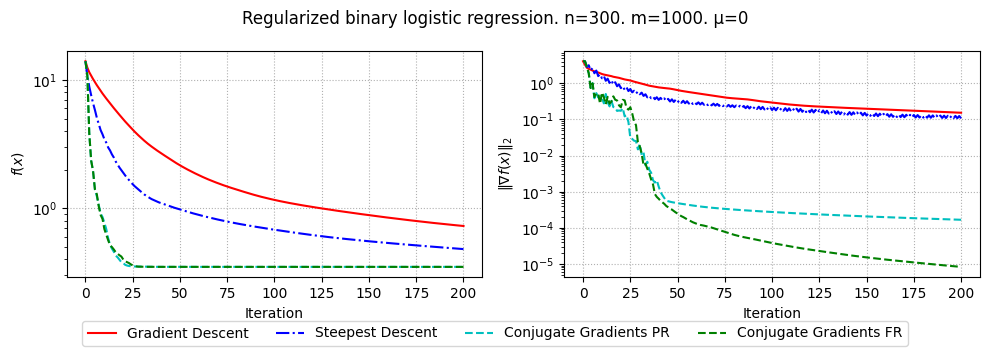

In [387]:
# Experiment parameters
params = {
    "n": 300,
    "m": 1000,
    "mu": 0,
    "alpha": 1e-1,
    "iterations": 200,
    "restart": None
}

results = run_experiment(params)
plot_results(results)

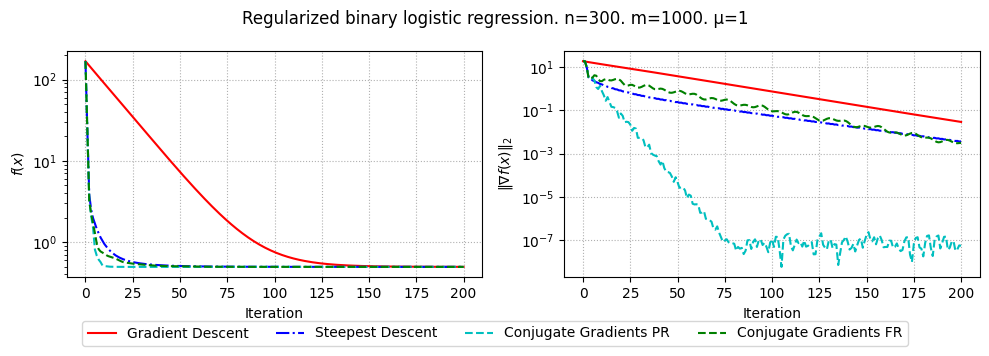

In [388]:
# Experiment parameters
params = {
    "n": 300,
    "m": 1000,
    "mu": 1,
    "alpha": 3e-2,
    "iterations": 200,
    "restart": None
}

results = run_experiment(params)
plot_results(results)

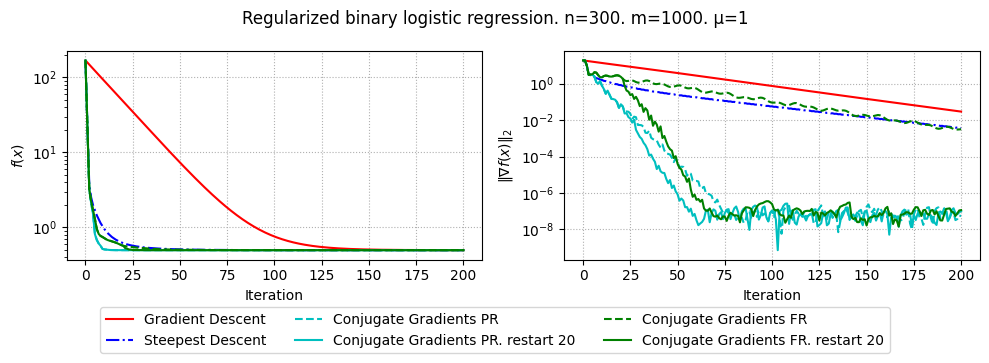

In [389]:
# Experiment parameters
params = {
    "n": 300,
    "m": 1000,
    "mu": 1,
    "alpha": 3e-2,
    "iterations": 200,
    "restart": 20
}

results = run_experiment(params)
plot_results(results)

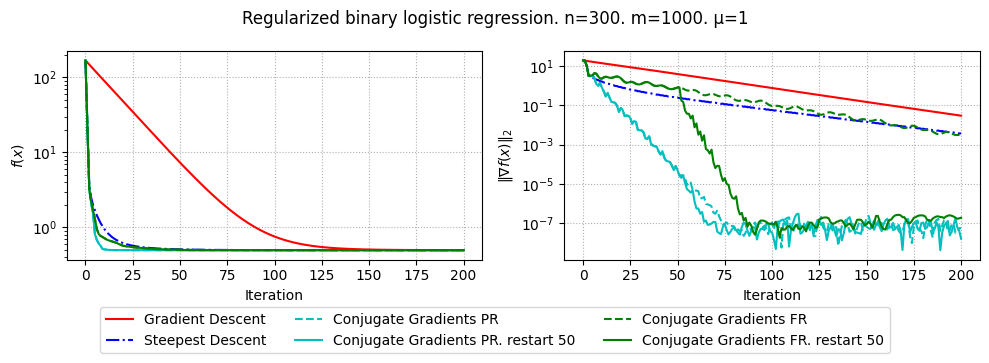

In [390]:
# Experiment parameters
params = {
    "n": 300,
    "m": 1000,
    "mu": 1,
    "alpha": 3e-2,
    "iterations": 200,
    "restart": 50
}

results = run_experiment(params)
plot_results(results)

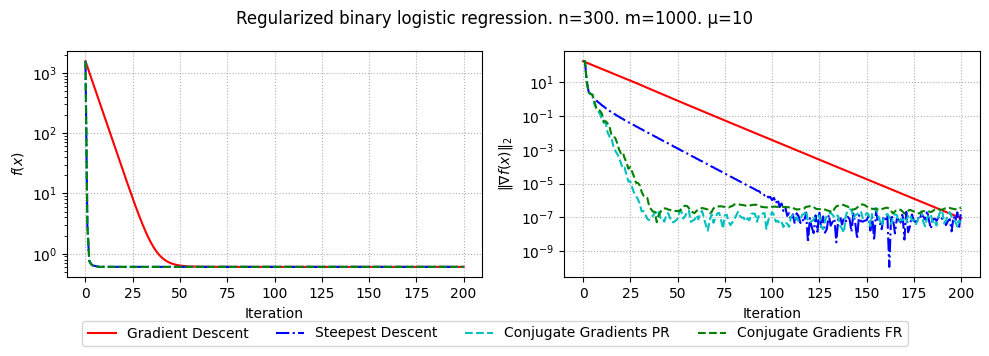

In [391]:
# Experiment parameters
params = {
    "n": 300,
    "m": 1000,
    "mu": 10,
    "alpha": 1e-2,
    "iterations": 200,
    "restart": None
}

results = run_experiment(params)
plot_results(results)

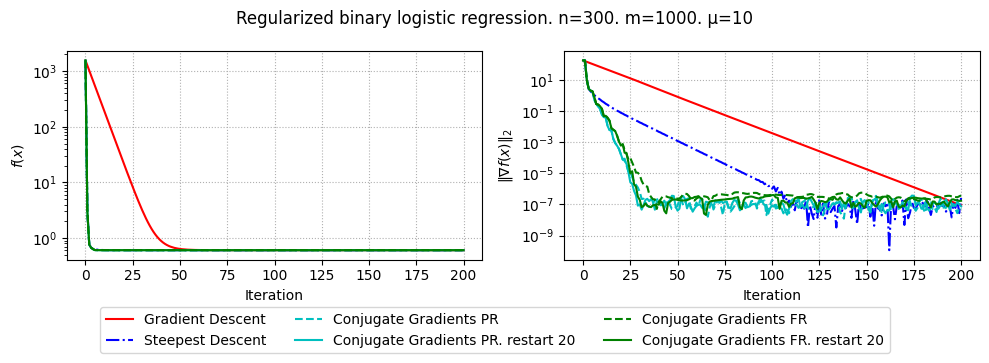

In [392]:
# Experiment parameters
params = {
    "n": 300,
    "m": 1000,
    "mu": 10,
    "alpha": 1e-2,
    "iterations": 200,
    "restart": 20
}

results = run_experiment(params)
plot_results(results)